In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
import datetime
import numpy as np
from snowpack_functions import unpack_netcdf_file_var
# basins = ["cascades","california","northernrockies","southernrockies","whites","plains","nwinterior","coastalnorth","coastalsouth","southwest"]
basins = ["plains","nwinterior","coastalnorth","coastalsouth","southwest"]
scenarios = ["historical","rcp45","rcp85"]
variables=["soilmoisture"]
models = ['CNRM-CM5','NorESM1-M','IPSL-CM5A-MR','CanESM2','CCSM4','HadGEM2-CC365','HadGEM2-ES365','MIROC5','bcc-csm1-1-m',
          'CSIRO-Mk3-6-0']

saving figure to '/raid9/gergel/agg_snowpack/plots/summer_sm/summer_sm_lowlands.png'


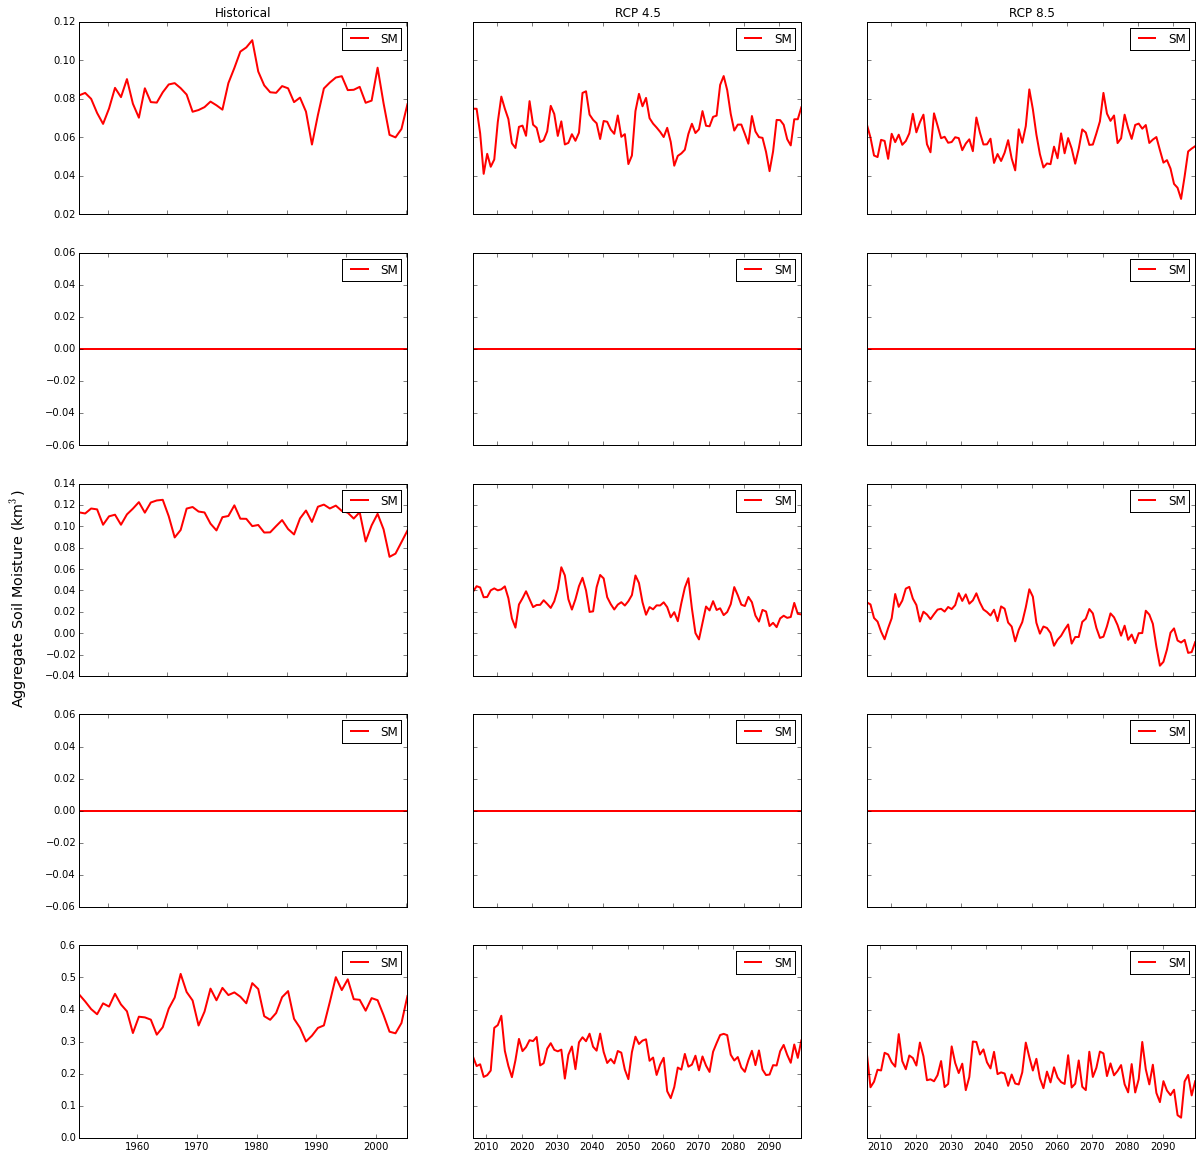

In [2]:
import matplotlib.dates 
lt = 20
rt = 20
lw = 2.0
for variable in variables: 
    num = 0
    fig = plt.figure(figsize=(lt,rt))

    for basin in basins: 
        for scenario in scenarios: 
            if (scenario == "historical"):
                base = datetime.datetime(1950, 4, 1)
                end_date = datetime.datetime(2006, 4, 1)
            else:
                base = datetime.datetime(2006, 4, 1)
                end_date = datetime.datetime(2100, 4, 1)
            direc = '/raid9/gergel/agg_snowpack/sm_summer' 
            file = '%s_%s.npz' %(basin,scenario)
            data = np.load(os.path.join(direc,file))
            sm = data['sm']
            
            direc = '/raid9/gergel/agg_snowpack/%s' %scenario
            file = '%s.npz' % "whites"
            data = np.load(os.path.join(direc,file))
            dates = data['dates']
            
            swe_gcms = np.ndarray(shape=(10,len(sm)))
            
            mod_count = 0
            for model in models:
                direc = '/raid9/gergel/agg_snowpack/sm_summer/'
                file = '%s_%s_%s.npz' % (basin,model,scenario)
                data = np.load(os.path.join(direc,file))
                sm = data['sm']
                swe_gcms[mod_count,:] = sm
                mod_count += 1 
            sm_mean = swe_gcms.mean(0)
            
            if (scenario == "historical"):
                ax = fig.add_subplot(5,3,num+1) 
                
            else: 
                ax = fig.add_subplot(5,3,num+1,sharey=ax) 
                plt.setp(ax.get_yticklabels(), visible=False)
        
            
            if (basin != "southwest"):
                plt.setp(ax.get_xticklabels(), visible=False)
            else: 
                ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(10))
                ax.autoscale_view()
            
            # dates_adj = dates.reshape(len(dates)/3,3)[:,0]
            
            ax.plot_date(dates,sm_mean,fmt='-',color='r',label='SM',linewidth=lw)
            # ax.plot(dates,sm,'r-',label='SM',linewidth=lw)
            
            plt.legend()
            
            if num == 0:
                ax.set_title('Historical')
            elif num == 1: 
                ax.set_title('RCP 4.5')
            elif num == 2:
                ax.set_title('RCP 8.5')
                
            num += 1
    
    

    fig.text(0.075, 0.5, 'Aggregate Soil Moisture (km$^{3}$)', va='center', rotation='vertical',size = 'x-large')

    
    
    ## save plot
    direc = '/raid9/gergel/agg_snowpack/plots/summer_sm'
    plotname = 'summer_sm_lowlands.png' 
    savepath = os.path.join(direc, plotname)
    print ("saving figure to '%s'" % savepath)
    plt.savefig(savepath)

saving figure to '/raid9/gergel/agg_snowpack/plots/summer_sm/summer_sm_uplands.png'


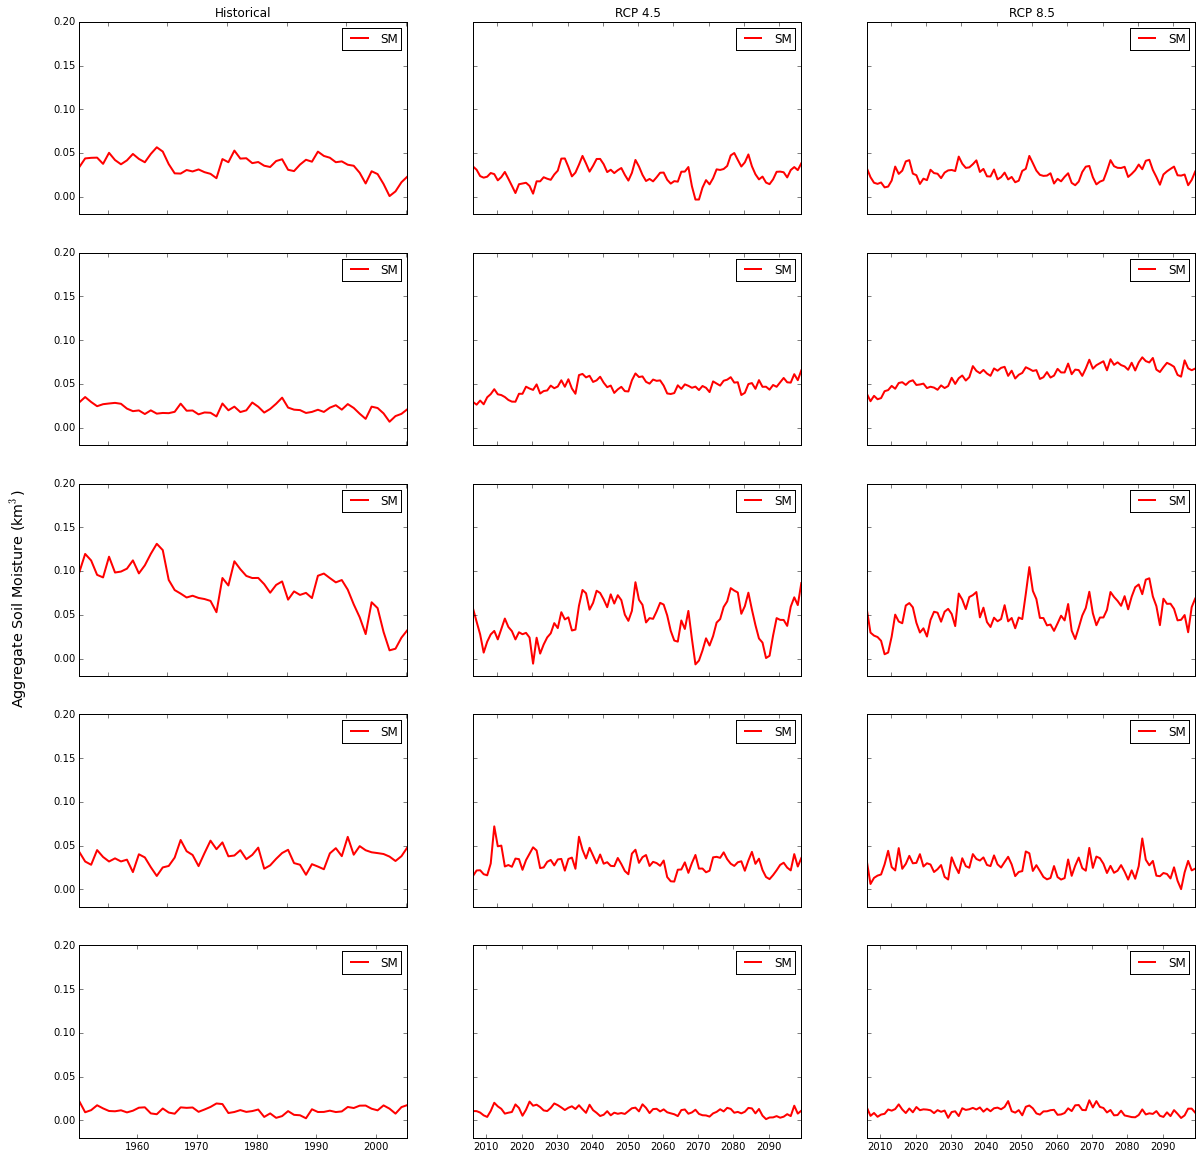

In [3]:
basins = ["cascades","california","northernrockies","southernrockies","whites"]
# basins = ["southernrockies"]

lt = 20
rt = 20
lw = 2.0

for variable in variables: 
    num = 0
    fig = plt.figure(figsize=(lt,rt))

    for basin in basins: 
        for scenario in scenarios: 
            if (scenario == "historical"):
                base = datetime.datetime(1950, 4, 1)
                end_date = datetime.datetime(2006, 4, 1)
            else:
                base = datetime.datetime(2006, 4, 1)
                end_date = datetime.datetime(2100, 4, 1)
            direc = '/raid9/gergel/agg_snowpack/sm_summer' 
            file = '%s_%s.npz' %(basin,scenario)
            data = np.load(os.path.join(direc,file))
            sm = data['sm']
            
            direc = '/raid9/gergel/agg_snowpack/%s' %scenario
            file = '%s.npz' % "whites"
            data = np.load(os.path.join(direc,file))
            dates = data['dates']
            
            '''direc_cdf = '/raid9/gergel/agg_snowpack/goodleap/%s' %basin
            file_cdf = 'TotalSoilMoist_ensavg_%s_%s_summer.nc' %(scenario,basin)
            lats,lons,sm_netcdf,dates = unpack_netcdf_file_var(direc_cdf,file_cdf,"TotalSoilMoist")'''
            
            if (scenario == "historical"):
                ax = fig.add_subplot(5,3,num+1) 
                
            else: 
                ax = fig.add_subplot(5,3,num+1,sharey=ax) 
                plt.setp(ax.get_yticklabels(), visible=False)
        
            
            if (basin != "whites"):
                plt.setp(ax.get_xticklabels(), visible=False)
            else: 
                ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(10))
                ax.autoscale_view()
            
            # dates_adj = dates.reshape(len(dates)/3,3)[:,0]
            
            ax.plot_date(dates,sm,fmt='-',color='r',label='SM',linewidth=lw)
            # ax.plot(dates,sm,'r-',label='SM',linewidth=lw)
            
            plt.ylim((-0.02,.2))
            
            plt.legend()
            
            if num == 0:
                ax.set_title('Historical')
            elif num == 1: 
                ax.set_title('RCP 4.5')
            elif num == 2:
                ax.set_title('RCP 8.5')
                
            num += 1
    
    

    fig.text(0.075, 0.5, 'Aggregate Soil Moisture (km$^{3}$)', va='center', rotation='vertical',size = 'x-large')

    
    
    ## save plot
    direc = '/raid9/gergel/agg_snowpack/plots/summer_sm'
    plotname = 'summer_sm_uplands.png' 
    savepath = os.path.join(direc, plotname)
    print ("saving figure to '%s'" % savepath)
    plt.savefig(savepath)

saving figure to '/raid9/gergel/agg_snowpack/plots/summer_sm/summer_sm_all.png'


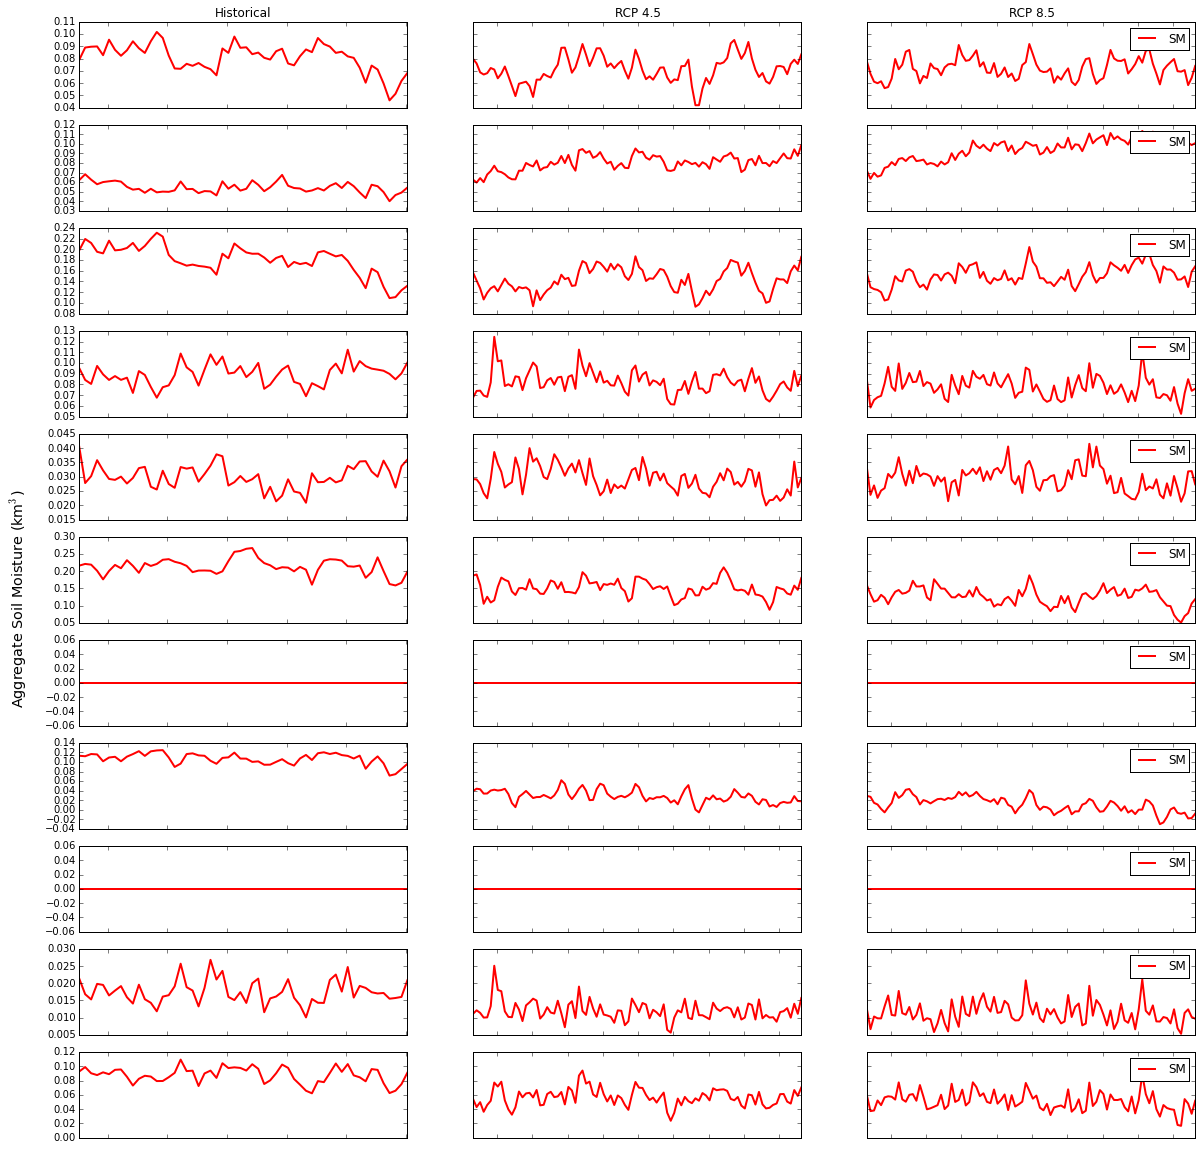

In [4]:
basins = ["cascades","california","northernrockies","southernrockies","whites","missouri","nwinterior","coastalnorth",
          "coastalsouth","lower_colorado","great_basin"]

lt = 20
rt = 20
lw = 2.0
for variable in variables: 
    num = 0
    fig = plt.figure(figsize=(lt,rt))

    for basin in basins: 
        for scenario in scenarios: 
            if (scenario == "historical"):
                base = datetime.datetime(1950, 4, 1)
                end_date = datetime.datetime(2006, 4, 1)
            else:
                base = datetime.datetime(2006, 4, 1)
                end_date = datetime.datetime(2100, 4, 1)
            direc = '/raid9/gergel/agg_snowpack/sm_summer' 
            file = '%s_%s.npz' %("whites",scenario)
            data = np.load(os.path.join(direc,file))
            sm = data['sm']
            
            direc = '/raid9/gergel/agg_snowpack/%s' %scenario
            file = '%s.npz' % "whites"
            data = np.load(os.path.join(direc,file))
            dates = data['dates']
            
            
            if (scenario == "historical"):
                ax = fig.add_subplot(11,3,num+1) 
                
            else: 
                ax = fig.add_subplot(11,3,num+1,sharey=ax) 
                plt.setp(ax.get_yticklabels(), visible=False)
        
            
            if (basin != "southwest"):
                plt.setp(ax.get_xticklabels(), visible=False)
            else: 
                ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(10))
                ax.autoscale_view()
            
            swe_gcms = np.ndarray(shape=(10,len(sm)))
            
            mod_count = 0
            for model in models:
                direc = '/raid9/gergel/agg_snowpack/sm_summer/'
                file = '%s_%s_%s.npz' % (basin,model,scenario)
                data = np.load(os.path.join(direc,file))
                sm = data['sm']
                swe_gcms[mod_count,:] = sm
                mod_count += 1 
            sm_mean = swe_gcms.mean(0)
            
            ax.plot_date(dates,sm_mean,fmt='-',color='r',label='SM',linewidth=lw)
            # ax.plot(dates,sm,'r-',label='SM',linewidth=lw)
            
            #plt.ylim((-8,6))
            
            if (scenario == "rcp85"):
                plt.legend()
            
            if num == 0:
                ax.set_title('Historical')
            elif num == 1: 
                ax.set_title('RCP 4.5')
            elif num == 2:
                ax.set_title('RCP 8.5')
                
            num += 1
    
    

    fig.text(0.075, 0.5, 'Aggregate Soil Moisture (km$^{3}$)', va='center', rotation='vertical',size = 'x-large')

    
    
    ## save plot
    direc = '/raid9/gergel/agg_snowpack/plots/summer_sm'
    plotname = 'summer_sm_all.png' 
    savepath = os.path.join(direc, plotname)
    print ("saving figure to '%s'" % savepath)
    plt.savefig(savepath)

saving figure to '/raid9/gergel/agg_snowpack/plots/summer_sm/summer_sm_gcms.png'


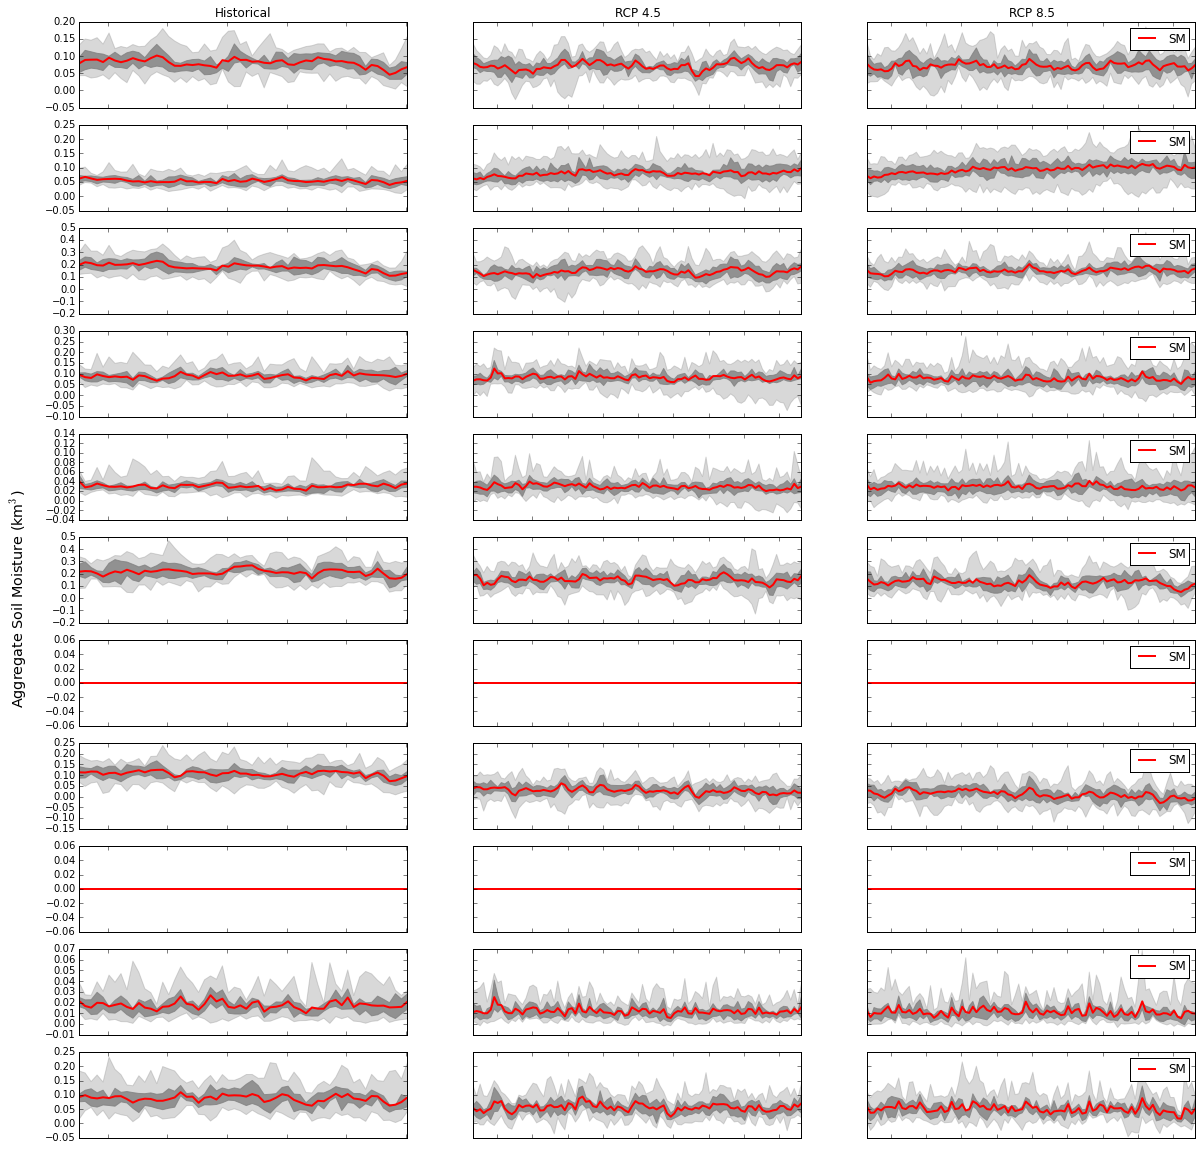

In [5]:
basins = ["cascades","california","northernrockies","southernrockies","whites","missouri","nwinterior","coastalnorth",
          "coastalsouth","lower_colorado","great_basin"]
models = ['CNRM-CM5','NorESM1-M','IPSL-CM5A-MR','CanESM2','CCSM4','HadGEM2-CC365','HadGEM2-ES365','MIROC5','bcc-csm1-1-m',
          'CSIRO-Mk3-6-0']

lt = 20
rt = 20
lw = 2.0
for variable in variables: 
    num = 0
    fig = plt.figure(figsize=(lt,rt))

    for basin in basins: 
        for scenario in scenarios: 
            direc = '/raid9/gergel/agg_snowpack/sm_summer' 
            file = '%s_%s.npz' %("whites",scenario)
            data = np.load(os.path.join(direc,file))
            sm = data['sm']
            
            direc = '/raid9/gergel/agg_snowpack/%s' %scenario
            file = '%s.npz' % "whites"
            data = np.load(os.path.join(direc,file))
            dates = data['dates']
            
            swe_gcms = np.ndarray(shape=(10,len(sm)))
            
            mod_count = 0
            for model in models:
                direc = '/raid9/gergel/agg_snowpack/sm_summer/'
                file = '%s_%s_%s.npz' % (basin,model,scenario)
                data = np.load(os.path.join(direc,file))
                sm = data['sm']
                swe_gcms[mod_count,:] = sm
                mod_count += 1 
            swe_max = swe_gcms.max(0)
            swe_min = swe_gcms.min(0)
            
            if (scenario == "historical"):
                ax = fig.add_subplot(11,3,num+1) 
                
            else: 
                ax = fig.add_subplot(11,3,num+1,sharey=ax) 
                plt.setp(ax.get_yticklabels(), visible=False)
        
            
            if (basin != "southwest"):
                plt.setp(ax.get_xticklabels(), visible=False)
            else: 
                ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(10))
                ax.autoscale_view()
            
            
            ax.plot_date(dates,swe_gcms.mean(0),fmt='-',color='r',label='SM',linewidth=lw)
            ax.fill_between(dates,swe_gcms.min(0),swe_gcms.max(0),color='grey',alpha=0.3)
            ax.fill_between(dates,np.percentile(swe_gcms,25,0),np.percentile(swe_gcms,75,0),color='grey',alpha=0.8)
                
            # plt.ylim((-8,25))
            
            if (scenario == "rcp85"):
                plt.legend()
                
            
            if num == 0:
                ax.set_title('Historical')
            elif num == 1: 
                ax.set_title('RCP 4.5')
            elif num == 2:
                ax.set_title('RCP 8.5')
                
            num += 1
    
    

    fig.text(0.075, 0.5, 'Aggregate Soil Moisture (km$^{3}$)', va='center', rotation='vertical',size = 'x-large')

    
    
    ## save plot
    direc = '/raid9/gergel/agg_snowpack/plots/summer_sm'
    plotname = 'summer_sm_gcms.png' 
    savepath = os.path.join(direc, plotname)
    print ("saving figure to '%s'" % savepath)
    plt.savefig(savepath)

HEATMAP WITH FULL TIME SERIES

saving figure to '/raid9/gergel/agg_snowpack/plots/summer_sm/heatmap_sm_gcms'


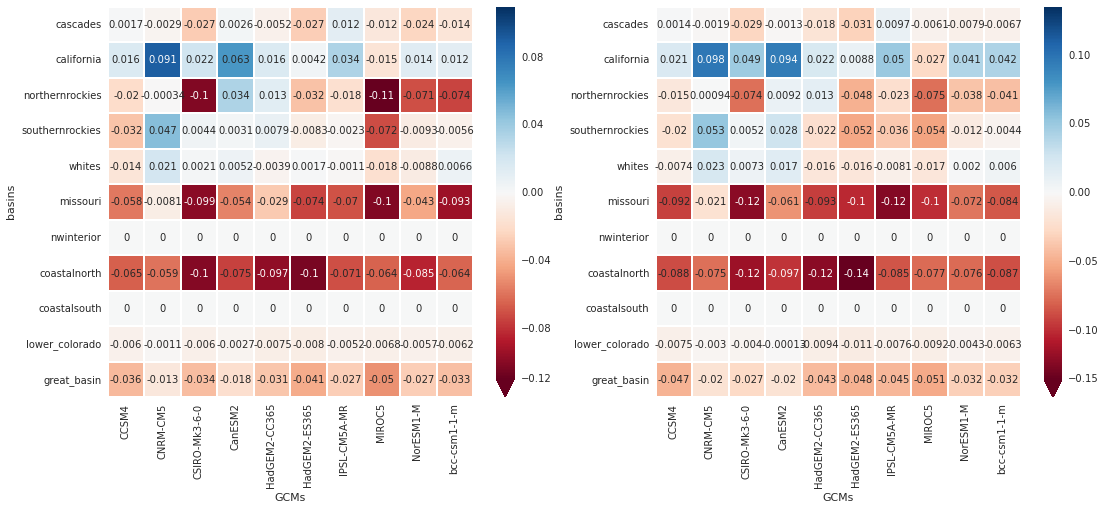

In [6]:
## make dataframe for heatmap 
import seaborn as sns
import pandas as pd
basins = ["cascades","california","northernrockies","southernrockies","whites","missouri",
          "nwinterior","coastalnorth","coastalsouth","lower_colorado","great_basin"]
models = ['CNRM-CM5','NorESM1-M','IPSL-CM5A-MR','CanESM2','CCSM4','HadGEM2-CC365','HadGEM2-ES365','MIROC5','bcc-csm1-1-m',
          'CSIRO-Mk3-6-0']
basins_10 = np.asarray(basins*10)
models_10 = np.asarray(models*11).reshape(11,10).T.ravel()
scenario = "rcp45"
diff_means = list()
for model in models: 
    for basin in basins: 
        direc = '/raid9/gergel/agg_snowpack/sm_summer/'
        file = '%s_%s_%s.npz' % (basin,model,"historical")
        data = np.load(os.path.join(direc,file))
        sm_hist = data['sm']
        sm_hist_mean = np.mean(sm_hist)

        file = '%s_%s_%s.npz' % (basin,model,scenario)
        data = np.load(os.path.join(direc,file))
        sm = data['sm']
        sm_mean = np.mean(sm)
        
        diff_means.append(sm_mean - sm_hist_mean)
        
diff_means = np.asarray(diff_means)

d = {'GCMs': models_10, 'basins': basins_10, 'means': diff_means}
df = pd.DataFrame(data=d,index=np.arange(110))
df_pivot = df.pivot("basins", "GCMs", "means")
df_pivot = df_pivot.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies','whites',
                                  'missouri','nwinterior','coastalnorth','coastalsouth','lower_colorado',
                                 'great_basin'], axis=0)

lt = 18
rt = 7

fig = plt.figure(figsize=(lt,rt))

ax = fig.add_subplot(1,2,1)
# sns.heatmap(df_pivot, annot=True, fmt="d", linewidths=.5)
sns.heatmap(df_pivot, annot=True, linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'})

######################################################################################################

scenario = "rcp85"
diff_means = list()
for model in models: 
    for basin in basins: 
        direc = '/raid9/gergel/agg_snowpack/sm_summer/'
        file = '%s_%s_%s.npz' % (basin,model,"historical")
        data = np.load(os.path.join(direc,file))
        sm_hist = data['sm']
        sm_hist_mean = np.mean(sm_hist)

        file = '%s_%s_%s.npz' % (basin,model,scenario)
        data = np.load(os.path.join(direc,file))
        sm = data['sm']
        sm_mean = np.mean(sm)
        
        diff_means.append(sm_mean - sm_hist_mean)
        
diff_means = np.asarray(diff_means)

d = {'GCMs': models_10, 'basins': basins_10, 'means': diff_means}
df = pd.DataFrame(data=d,index=np.arange(110))
df_pivot = df.pivot("basins", "GCMs", "means")
df_pivot = df_pivot.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies','whites','missouri',
                                  'nwinterior','coastalnorth','coastalsouth','lower_colorado',
                                 'great_basin'], axis=0)

ax = fig.add_subplot(1,2,2)

sns.heatmap(df_pivot, annot=True, linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'})

## save plot
direc = '/raid9/gergel/agg_snowpack/plots/summer_sm'
plotname = 'heatmap_sm_gcms' 
savepath = os.path.join(direc, plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath)
    

HEATMAP IN 30 YEAR CHUNKS

saving figure to '/raid9/gergel/agg_snowpack/plots/summer_sm/heatmap_sm_gcms_30yr'


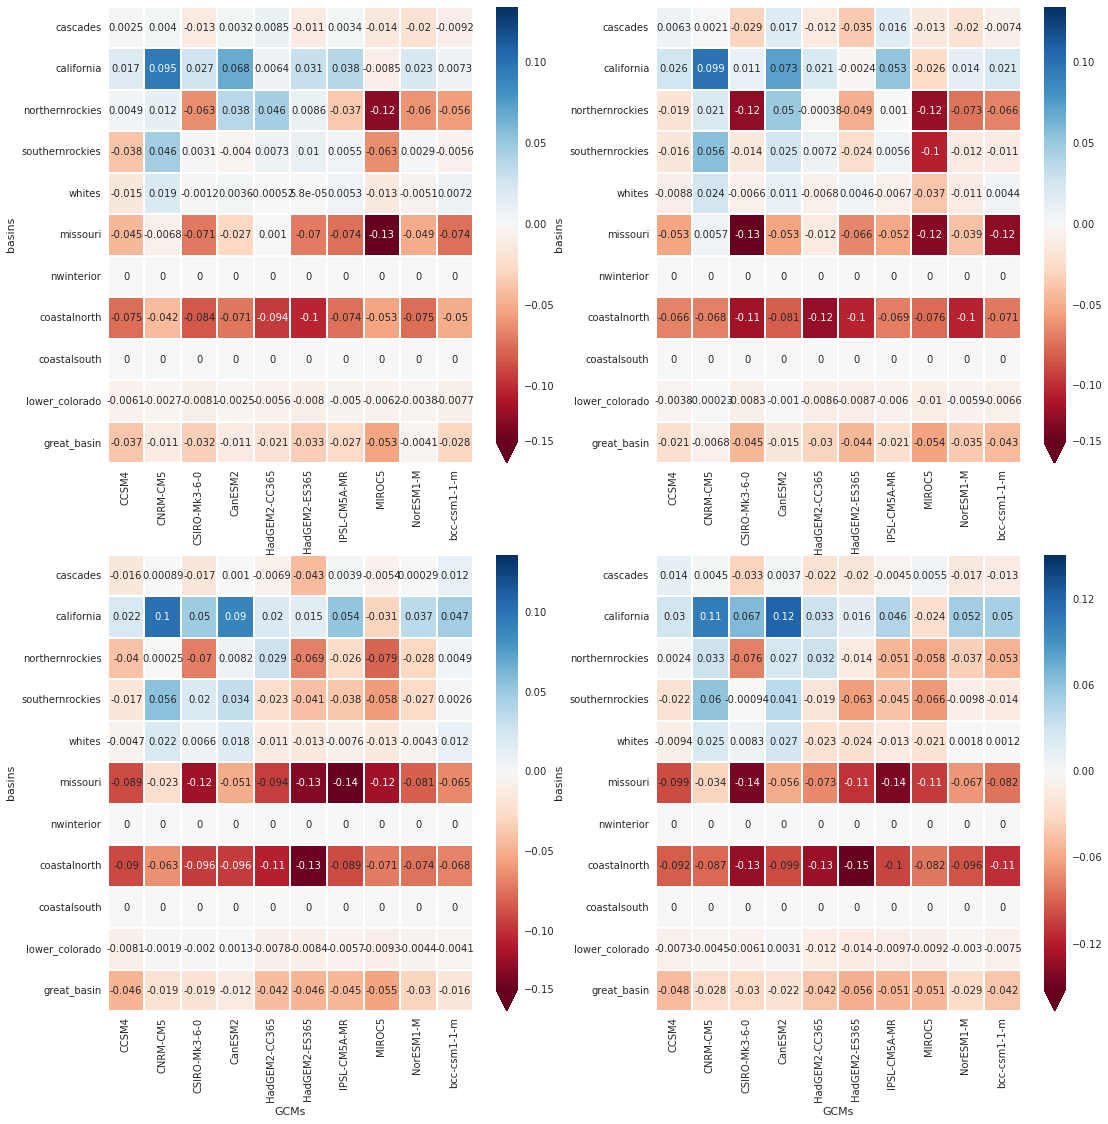

In [7]:
lt = 18
rt = 18

fig = plt.figure(figsize=(lt,rt))

scenario = "rcp45"

diff_means = list()
for model in models: 
    for basin in basins: 
        direc = '/raid9/gergel/agg_snowpack/sm_summer/'
        file = '%s_%s_%s.npz' % (basin,model,"historical")
        data = np.load(os.path.join(direc,file))
        sm_hist = data['sm']
        sm_hist_mean = np.mean(sm_hist)

        file = '%s_%s_%s.npz' % (basin,model,scenario)
        data = np.load(os.path.join(direc,file))
        sm = data['sm']
        sm_mean = np.mean(sm[24:54]) ## 2040s 
        
        diff_means.append(sm_mean - sm_hist_mean)
        
diff_means = np.asarray(diff_means)

d = {'GCMs': models_10, 'basins': basins_10, 'means': diff_means}
df = pd.DataFrame(data=d,index=np.arange(110))
df_pivot = df.pivot("basins", "GCMs", "means")
# df_pivot = df_pivot.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies','whites','plains','nwinterior','coastalnorth','coastalsouth','southwest'], axis=0)
df_pivot = df_pivot.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies','whites','missouri',
                                  'nwinterior','coastalnorth','coastalsouth','lower_colorado',
                                 'great_basin'], axis=0)

ax = fig.add_subplot(2,2,1)
# sns.heatmap(df_pivot, annot=True, fmt="d", linewidths=.5)
sns.heatmap(df_pivot, annot=True, linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'})

#############################################################

diff_means = list()
for model in models: 
    for basin in basins: 
        direc = '/raid9/gergel/agg_snowpack/sm_summer/'
        file = '%s_%s_%s.npz' % (basin,model,"historical")
        data = np.load(os.path.join(direc,file))
        sm_hist = data['sm']
        sm_hist_mean = np.mean(sm_hist)

        file = '%s_%s_%s.npz' % (basin,model,scenario)
        data = np.load(os.path.join(direc,file))
        sm = data['sm']
        sm_mean = np.mean(sm[64:94]) ## 2040s 
        
        diff_means.append(sm_mean - sm_hist_mean)
        
diff_means = np.asarray(diff_means)

d = {'GCMs': models_10, 'basins': basins_10, 'means': diff_means}
df = pd.DataFrame(data=d,index=np.arange(110))
df_pivot = df.pivot("basins", "GCMs", "means")
#df_pivot = df_pivot.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies','whites','plains','nwinterior','coastalnorth','coastalsouth','southwest'], axis=0)
df_pivot = df_pivot.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies','whites','missouri',
                                  'nwinterior','coastalnorth','coastalsouth','lower_colorado',
                                 'great_basin'], axis=0)

ax = fig.add_subplot(2,2,2)
# sns.heatmap(df_pivot, annot=True, fmt="d", linewidths=.5)
sns.heatmap(df_pivot, annot=True, linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'})

#######################################################################################################################

scenario = "rcp85"

diff_means = list()
for model in models: 
    for basin in basins: 
        direc = '/raid9/gergel/agg_snowpack/sm_summer/'
        file = '%s_%s_%s.npz' % (basin,model,"historical")
        data = np.load(os.path.join(direc,file))
        sm_hist = data['sm']
        sm_hist_mean = np.mean(sm_hist)

        file = '%s_%s_%s.npz' % (basin,model,scenario)
        data = np.load(os.path.join(direc,file))
        sm = data['sm']
        sm_mean = np.mean(sm[24:54])
        
        diff_means.append(sm_mean - sm_hist_mean)
        
diff_means = np.asarray(diff_means)

d = {'GCMs': models_10, 'basins': basins_10, 'means': diff_means}
df = pd.DataFrame(data=d,index=np.arange(110))
df_pivot = df.pivot("basins", "GCMs", "means")
#df_pivot = df_pivot.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies','whites','plains','nwinterior','coastalnorth','coastalsouth','southwest'], axis=0)
df_pivot = df_pivot.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies','whites','missouri',
                                  'nwinterior','coastalnorth','coastalsouth','lower_colorado',
                                 'great_basin'], axis=0)

ax = fig.add_subplot(2,2,3)

sns.heatmap(df_pivot, annot=True, linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'})

###############################################

diff_means = list()
for model in models: 
    for basin in basins: 
        direc = '/raid9/gergel/agg_snowpack/sm_summer/'
        file = '%s_%s_%s.npz' % (basin,model,"historical")
        data = np.load(os.path.join(direc,file))
        sm_hist = data['sm']
        sm_hist_mean = np.mean(sm_hist)

        file = '%s_%s_%s.npz' % (basin,model,scenario)
        data = np.load(os.path.join(direc,file))
        sm = data['sm']
        sm_mean = np.mean(sm[64:94])
        
        diff_means.append(sm_mean - sm_hist_mean)
        
diff_means = np.asarray(diff_means)

d = {'GCMs': models_10, 'basins': basins_10, 'means': diff_means}
df = pd.DataFrame(data=d,index=np.arange(110))
df_pivot = df.pivot("basins", "GCMs", "means")
#df_pivot = df_pivot.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies','whites','plains','nwinterior','coastalnorth','coastalsouth','southwest'], axis=0)
df_pivot = df_pivot.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies','whites','missouri',
                                  'nwinterior','coastalnorth','coastalsouth','lower_colorado',
                                 'great_basin'], axis=0)

ax = fig.add_subplot(2,2,4)

sns.heatmap(df_pivot, annot=True, linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'})

## save plot
direc = '/raid9/gergel/agg_snowpack/plots/summer_sm'
plotname = 'heatmap_sm_gcms_30yr' 
savepath = os.path.join(direc, plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath)

SOIL MOISTURE HEATMAP IN 30 YEAR CHUNKS WITH STATISTICAL SIGNIFICANCE

In [8]:
def make_df_for_heatmap(modelss,basinss,scenario,fcn,timebeg,timeend):
    from scipy import stats
    diff_means = list()
    pvals = list()
    for model in models: 
        for basin in basins: 
            direc = '/raid9/gergel/agg_snowpack/sm_summer/'
            file = '%s_%s_%s.npz' % (basin,model,"historical")
            data = np.load(os.path.join(direc,file))
            sm_hist = data['sm']
            if fcn == "average":
                sm_hist_mean = np.mean(sm_hist)

            file = '%s_%s_%s.npz' % (basin,model,scenario)
            data = np.load(os.path.join(direc,file))
            sm = data['sm']
            if fcn == "average":
                sm_mean = np.mean(sm[timebeg:timeend]) 
            
            pvals.append(stats.ttest_ind(sm_hist,sm,equal_var=False)[1])
            diff_means.append(sm_mean - sm_hist_mean)

    diff_means = np.around(np.asarray(diff_means),2)
    pvals = np.asarray(pvals)

    d = {'GCMs': modelss, 'basins': basinss, 'means': diff_means}
    d_pvals = {'GCMs': modelss, 'basins': basinss, 'means': pvals}
    df = pd.DataFrame(data=d,index=np.arange(110))
    df_pvals = pd.DataFrame(data=d_pvals,index=np.arange(110))
    df_pivot = df.pivot("basins", "GCMs", "means")
    df_pivot_pvals = df_pvals.pivot("basins", "GCMs", "means")
    
    '''df_pivot = df_pivot.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies','whites','plains',
                                      'nwinterior','coastalnorth','coastalsouth','southwest'], axis=0)'''
    df_pivot = df_pivot.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies','whites','missouri',
                                      'nwinterior','coastalnorth','coastalsouth','lower_colorado',
                                      'great_basin'], axis=0)
    
    df_pivot_pvals = df_pivot_pvals.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies','whites','missouri',
                                  'nwinterior','coastalnorth','coastalsouth','lower_colorado',
                                 'great_basin'], axis=0)
    
    '''df_pivot_pvals = df_pivot_pvals.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies',
                                                  'whites','plains','nwinterior','coastalnorth','coastalsouth',
                                                  'southwest'], axis=0)'''
    df_pivot_pvals = df_pivot_pvals.iloc[::-1].values.ravel() ## flips over the dataframe, then makes it one dimension so that it can be 
                                             ## iterated through the same way as ax.text 
    
    return(df_pivot,diff_means,df_pivot_pvals)

def denote_stat_sig(pvals,pivot_table_values,plot_obj):
    count = 0
    for text in plot_obj.texts:
        text.set_size(8)
        if pvals[count] < 0.05: 
            text.set_color('blue')
            text.set_weight('bold')
            text.set_style('italic')
        count += 1 
    return(plot_obj)

saving figure to '/raid9/gergel/agg_snowpack/plots/summer_sm/heatmap_sm_gcms_30yr_stat_sig'


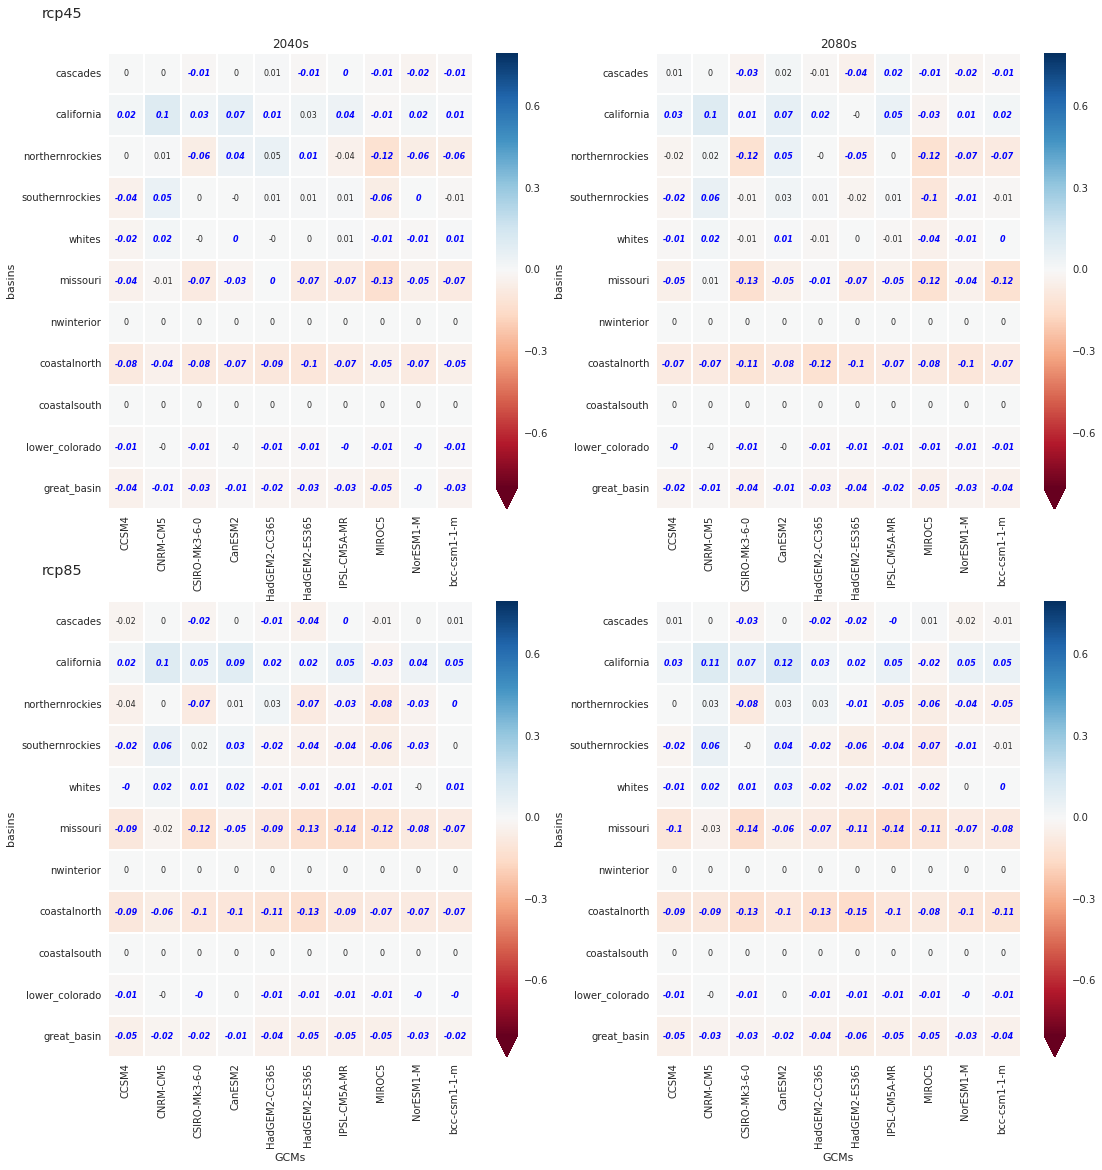

In [9]:
lt = 18
rt = 18
fig = plt.figure(figsize=(lt,rt))

## 2040s rcp45 
df_pivot,diff_means,pvals = make_df_for_heatmap(models_10,basins_10,"rcp45","average",24,54)
ax = fig.add_subplot(2,2,1)
sns.heatmap(df_pivot, annot=True, linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'},vmin=-0.8,vmax=0.8)
ax.set_title("2040s")
ax = denote_stat_sig(pvals,diff_means,ax)

## 2080s rcp45 
df_pivot,diff_means,pvals = make_df_for_heatmap(models_10,basins_10,"rcp45","average",64,94)
ax = fig.add_subplot(2,2,2)
sns.heatmap(df_pivot, annot=True, linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'},vmin=-0.8,vmax=0.8)
ax.set_title("2080s")
ax = denote_stat_sig(pvals,diff_means,ax)

## 2040s rcp85 
df_pivot,diff_means,pvals = make_df_for_heatmap(models_10,basins_10,"rcp85","average",24,54)
ax = fig.add_subplot(2,2,3)
sns.heatmap(df_pivot, annot=True, linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'},vmin=-0.8,vmax=0.8)
ax = denote_stat_sig(pvals,diff_means,ax)

## 2080s rcp85 
df_pivot,diff_means,pvals = make_df_for_heatmap(models_10,basins_10,"rcp85","average",64,94)
ax = fig.add_subplot(2,2,4)
sns.heatmap(df_pivot, annot=True, linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'},vmin=-0.8,vmax=0.8)
ax = denote_stat_sig(pvals,diff_means,ax)

fig.text(0.075, 0.5, 'rcp85', va='center', rotation='horizontal',size = 'x-large')
fig.text(0.075, 0.93, 'rcp45', va='center', rotation='horizontal',size = 'x-large')

## save plot
direc = '/raid9/gergel/agg_snowpack/plots/summer_sm'
plotname = 'heatmap_sm_gcms_30yr_stat_sig' 
savepath = os.path.join(direc, plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath)

-0.0

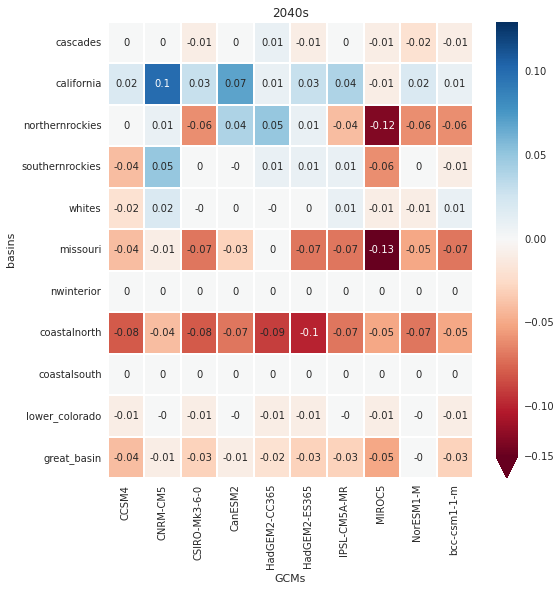

In [10]:
lt = 18
rt = 18
fig = plt.figure(figsize=(lt,rt))

## 2040s rcp45 
df_pivot,diff_means,pvals = make_df_for_heatmap(models_10,basins_10,"rcp45","average",24,54)
ax = fig.add_subplot(2,2,1)
sns.heatmap(df_pivot, annot=True, linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'})
ax.set_title("2040s")
#df_pivot.iloc[::-1].iloc[0,1]
df_pivot.iloc[::-1].values.ravel()[11]

In [11]:
ax.texts[11].get_text()

u'-0'